## Validacion con test estadístico: Bootstrap

In [1]:
from bootstrap import * 
from statsmodels.sandbox.stats.multicomp import multipletests
import seaborn as sns
%matplotlib inline

Cargo los dataframes para calcular bootstrap, el código esta comentado para que no se corra de nuevo. Los resultados ya estan guardados en .csv listos para cargar

In [2]:

# ivalues = 'notebooks/ivalue_entropia_personas_palabras.csv'
# df2 = pd.DataFrame.from_csv(ivalues,header=0,encoding='utf-8')

# # listado de todas las provincias de argentina
# provincias = ['jujuy',  'catamarca',  'sanjuan',  'salta',  'rionegro',  'lapampa',  'chaco',
#                'mendoza',  'buenosaires',  'entrerios',  'chubut',  'santacruz',  'neuquen',
#                'misiones',  'corrientes',  'formosa',  'santafe',  'santiago',  'cordoba',  'larioja',  'tierradelfuego',  'tucuman',  'sanluis']


# # el path donde se encuentran los .csv con la cantidad de ocurrencias de cada palabra por cada usuario.
# # hay un csv por cada provincia, con el nombre [nombreProvincia].csv
# path = './dataUsuarios/filtrado/'


# # leo todos los .csv de cada provincia y creo variables con los dataframes de cada provincia con su nombre respectivo.
# # ej. la variable buenosaires va a tener el dataframe de buenos aires

# freqs = {}
# for p in provincias:
#     start = datetime.datetime.now()
#     freqs[p] = pd.DataFrame.from_csv(path = path+p+'.csv',encoding='utf-8') # probar con encoding='utf-8'
#     end = datetime.datetime.now()
#     print(p,str(end-start))



In [3]:
# start = datetime.datetime.now()
# df3 = pd.DataFrame()
# df3.loc[:,'pvalorBootstrap'] = df2.apply(lambda x: pvalor(x.name,df2,freqs,provincias),axis=1)
# df3.to_csv('./testEstadisticos/bootstrapTest.csv',encoding='utf-8')
# end = datetime.datetime.now()
# print("bootstrapTest: ",str(end-start))

In [4]:
#cargo el dataframe con el resultado de haber aplicado bootstrapTest a las primeras 30000 las palabras
df3 = pd.DataFrame.from_csv("testEstadisticos/bootstrapTest.csv",encoding='utf-8')

In [5]:
ivalues = 'notebooks/ivalue_entropia_personas_palabras.csv'
df2 = pd.DataFrame.from_csv(ivalues,header=0,encoding='utf-8')

In [6]:
candidatas = pd.DataFrame.from_csv("definitivo.csv",encoding="utf-8")
candidatas = candidatas[candidatas["Palabra Candidata"]=="1"].index
candidatas_df = df3.loc[candidatas]
candidatas_df.dropna(inplace=True)
p_adjusted = multipletests(candidatas_df.pvalorBootstrap, method="fdr_bh")
candidatas_df["p_adjusted"] = p_adjusted[1]
candidatas_df["rechazo_H0"] = p_adjusted[0]


In [7]:
candidatas_df.head(5)

,pvalorBootstrap,p_adjusted,rechazo_H0
,,,
cldo,0.0005,0.000532,True
fueguinos,0.0005,0.000532,True
aijue,0.0005,0.000532,True
alvearense,0.0005,0.000532,True
fueguino,0.0005,0.000532,True


In [8]:
# agrego la posicion en base a la metrica elegida que tenia en cuenta la entropia de las palabras y de las personas
df4 = pd.merge(candidatas_df, df2, left_index=True,right_index=True)

## Gráficos de pvalores vs posición de palabra en listado ordenado por la métrica

[]

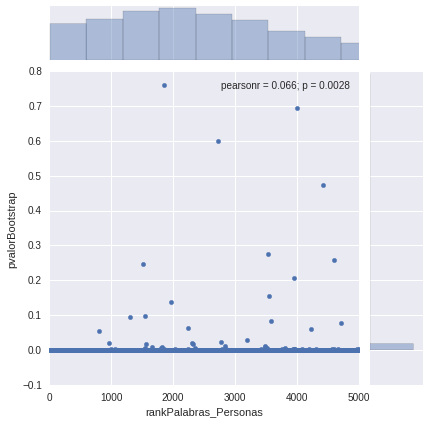

In [21]:
sns.jointplot(x="rankPalabras_Personas", y="pvalorBootstrap", data=df4,kind="scatter",size=6,xlim=[0,5000]);
# df4.plot(x='rankPalabras_Personas',y="pvalorBootstrap")
plt.plot(x=[0,5000],y=[0.05,0.05], linewidth=2)

[]

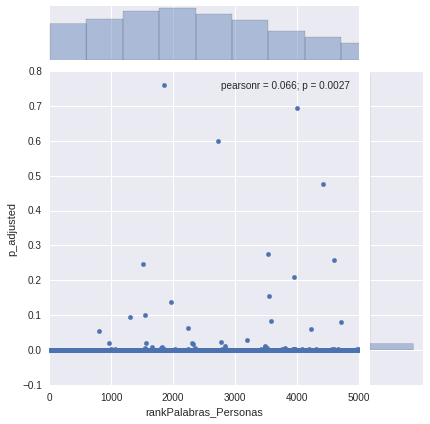

In [10]:
sns.jointplot(x="rankPalabras_Personas", y="p_adjusted", data=df4,kind="scatter",size=6,xlim=[0,5000]);
# df4.plot(x='rankPalabras_Personas',y="pvalorBootstrap")
plt.plot(x=[0,5000],y=[0.05,0.05], linewidth=2)

In [11]:
candidatas

Index([       u'cldo',   u'fueguinos',       u'aijue',  u'alvearense',
          u'fueguino',    u'malpegue', u'comodorense', u'rionegrinos',
             u'mitai',       u'yarca',
       ...
           u'guasada',         u'asa',         u'pio',       u'pinga',
           u'charros',     u'cumpaaa',     u'tortita',      u'charro',
            u'yutaaa',      u'fayuta'],
      dtype='object', name=u' ', length=2103)

In [12]:
candidatas_df.shape

(2060, 3)

## Tasa de rechazo de $H_0$ para las palabras candidatas

In [13]:
tasa_rechazoH0 = candidatas_df.rechazo_H0.mean()*100
print("La tasa de rechazo de sobre las palabras candidatas CON la correción BH es de {0}".format(tasa_rechazoH0))
print("La tasa de rechazo de sobre las palabras candidatas SIN la correción BH es de {0}".format((candidatas_df.pvalorBootstrap<0.05).mean()*100))

La tasa de rechazo de sobre las palabras candidatas CON la correción BH es de 98.5922330097
La tasa de rechazo de sobre las palabras candidatas SIN la correción BH es de 98.5922330097


## Tasa de rechazo de $H_0$ para todas las palabras (con más de 40 ocurrencias o dichas por más de 5 usuarios)

In [14]:
todas_df = pd.DataFrame.from_csv("testEstadisticos/bootstrapTest.csv",encoding='utf-8')
p_adjusted = multipletests(todas_df.pvalorBootstrap, method='fdr_bh')
todas_df["p_adjusted"] = p_adjusted[1]
todas_df["rechazo_H0"] = p_adjusted[0]
tasa_rechazoH0 = todas_df.rechazo_H0.mean()*100
print("La tasa de rechazo de sobre todas las palabras CON la correción BH es de {0}".format(tasa_rechazoH0))
print("La tasa de rechazo de sobre todas las palabras SIN la correción BH es de {0}".format((todas_df.pvalorBootstrap<0.05).mean()*100))

La tasa de rechazo de sobre todas las palabras CON la correción BH es de 92.8666666667
La tasa de rechazo de sobre todas las palabras SIN la correción BH es de 93.1066666667


## Las palabras candidatas que no fueron rechazadas

In [15]:
palabras_candidatas_no_rechazadas = candidatas_df[candidatas_df.rechazo_H0 == False].index
palabras_candidatas_no_rechazadas

Index([  u'tucumanas', u'chamamecero',      u'surubí',   u'escalafón',
            u'choras',     u'viñedos',            nan,    u'chupitos',
          u'biosfera',       u'sonsa',    u'alquimia',    u'cantobar',
          u'cocheria',        u'buah',     u'cobijas',   u'vertedero',
          u'enmienda',     u'bonarda',       u'batió',       u'tapes',
            u'wiiina',    u'notarial',         u'fua',   u'descarado',
       u'langostinos',  u'felicidade',     u'gramajo', u'fronterizos',
             u'etamo'],
      dtype='object', name=u' ')

## Las palabras candidatas que fueron rechazadas:

In [16]:
palabras_candidatas_rechazadas = candidatas_df[candidatas_df.rechazo_H0 == True].index
palabras_candidatas_rechazadas

Index([u'cldo', u'fueguinos', u'aijue', u'alvearense', u'fueguino',
       u'malpegue', u'comodorense', u'rionegrinos', u'mitai', u'yarca',
       ...
       u'asadaso', u'guasada', u'asa', u'pio', u'pinga', u'charros',
       u'cumpaaa', u'tortita', u'charro', u'fayuta'],
      dtype='object', name=u' ', length=2031)

## Histograma de pvalores de palabras candidatas

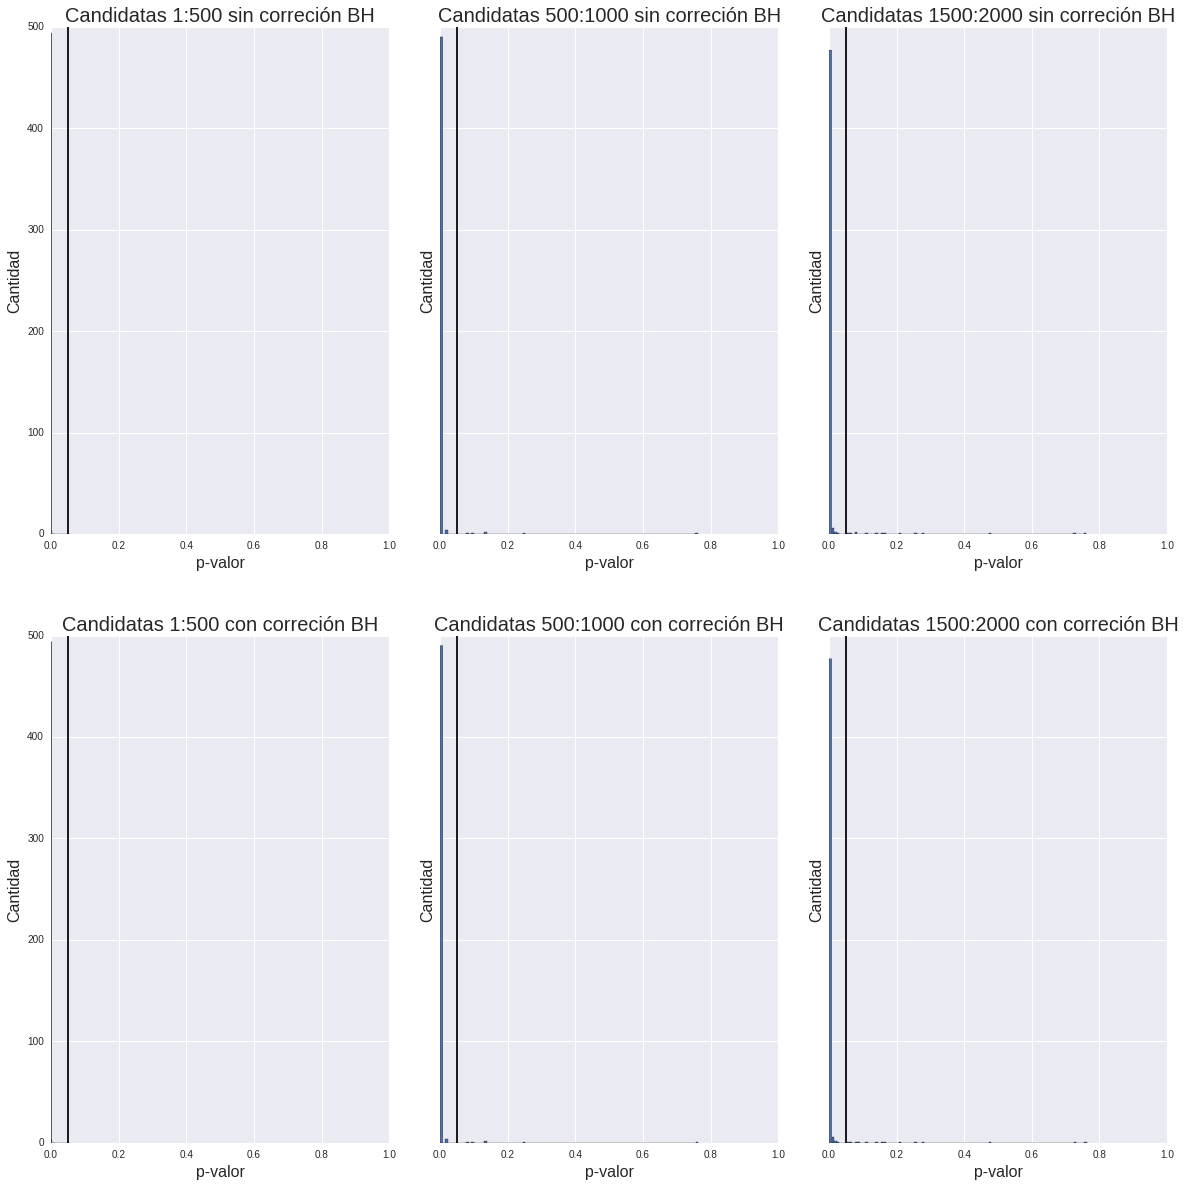

In [17]:
fig, axs = plt.subplots(nrows=2,ncols=3,sharey=True,figsize = (20,20))
candidatas_df.pvalorBootstrap.iloc[1:500].hist(ax=axs[0][0],bins=100)
candidatas_df.pvalorBootstrap.iloc[500:1000].hist(ax=axs[0][1],bins=100)
candidatas_df.pvalorBootstrap.iloc[1500:2000].hist(ax=axs[0][2],bins=100)
candidatas_df.p_adjusted.iloc[1:500].hist(ax=axs[1][0],bins=100)
candidatas_df.p_adjusted.iloc[500:1000].hist(ax=axs[1][1],bins=100)
candidatas_df.p_adjusted.iloc[1500:2000].hist(ax=axs[1][2],bins=100)
fig.subplots_adjust(hspace=.2)
fig.subplots_adjust(wspace=.15)
for ax in axs.flatten():
    ax.set_xlabel("p-valor",fontsize=16)
    ax.set_ylabel("Cantidad",fontsize=16)
    ax.set_xlim([0,1])
    ax.axvline(0.05, color='black')
axs[0][0].set_title(u"Candidatas 1:500 sin correción BH",fontsize=20)
axs[0][1].set_title(u"Candidatas 500:1000 sin correción BH",fontsize=20)
axs[0][2].set_title(u"Candidatas 1500:2000 sin correción BH",fontsize=20)
axs[1][0].set_title(u"Candidatas 1:500 con correción BH",fontsize=20)
axs[1][1].set_title(u"Candidatas 500:1000 con correción BH",fontsize=20)
axs[1][2].set_title(u"Candidatas 1500:2000 con correción BH",fontsize=20)


Se ve que la correción de Benjamini Hocheberg no modifica la tasa de rechazo. Sin embargo esta corrección asume independencia entre los tests, lo cual no se que tan cierto es en nuestro caso...

## Histograma de pvalores de todas las palabras

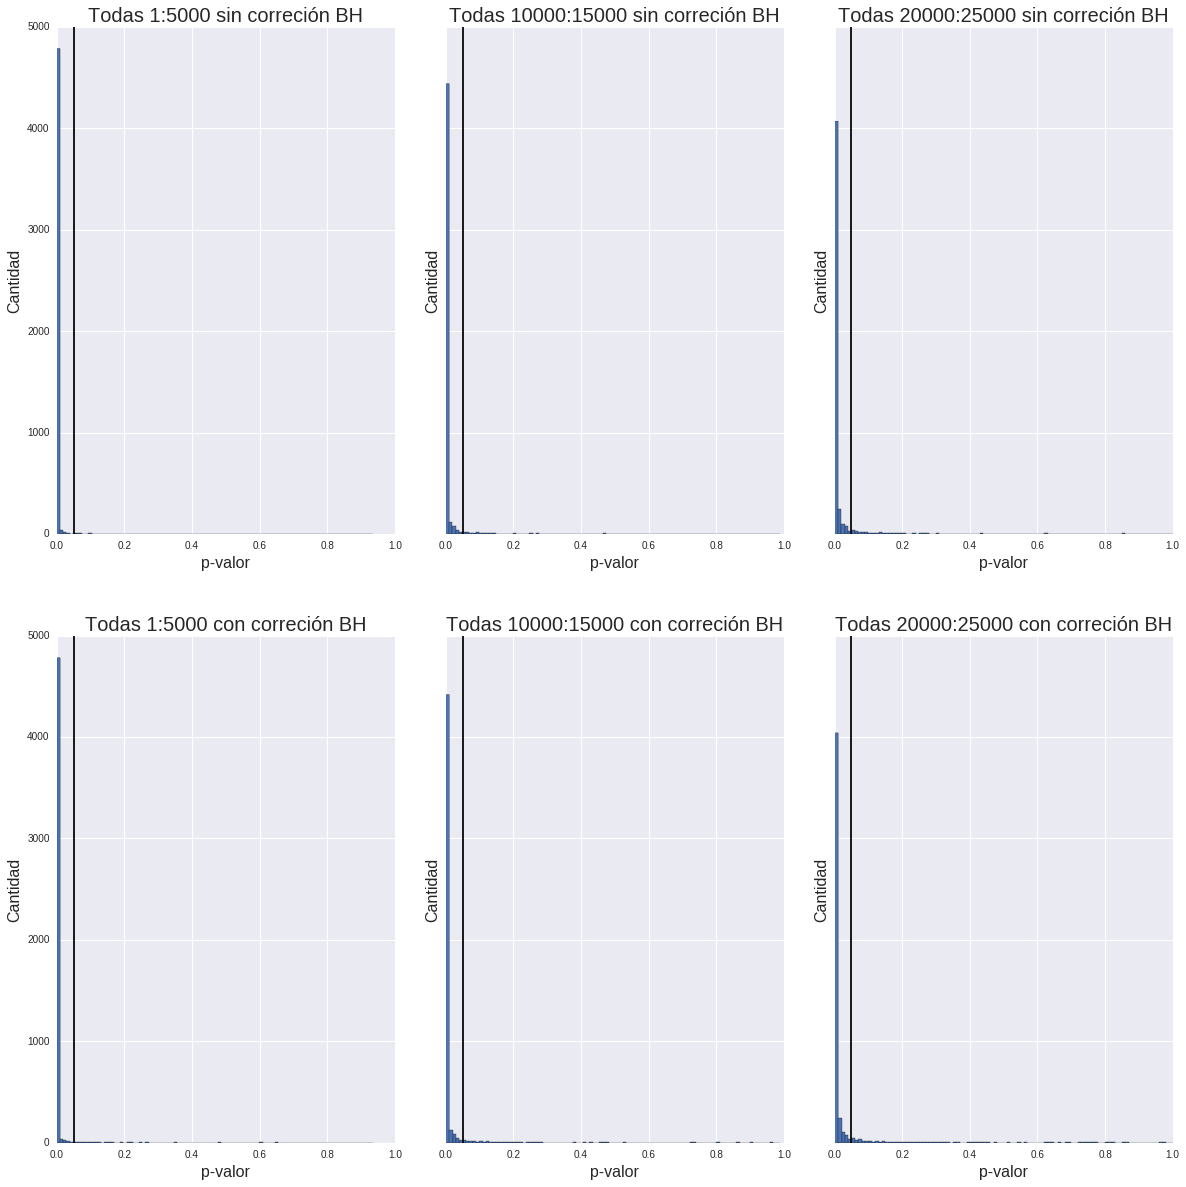

In [18]:
fig, axs = plt.subplots(nrows=2,ncols=3,sharey=True,figsize = (20,20))
todas_df.pvalorBootstrap.iloc[1:5000].hist(ax=axs[0][0],bins=100)
todas_df.pvalorBootstrap.iloc[10000:15000].hist(ax=axs[0][1],bins=100)
todas_df.pvalorBootstrap.iloc[20000:25000].hist(ax=axs[0][2],bins=100)
todas_df.p_adjusted.iloc[1:5000].hist(ax=axs[1][0],bins=100)
todas_df.p_adjusted.iloc[10000:15000].hist(ax=axs[1][1],bins=100)
todas_df.p_adjusted.iloc[20000:25000].hist(ax=axs[1][2],bins=100)
fig.subplots_adjust(hspace=.2)
fig.subplots_adjust(wspace=.15)
for ax in axs.flatten():
    ax.set_xlabel("p-valor",fontsize=16)
    ax.set_ylabel("Cantidad",fontsize=16)
    ax.set_xlim([0,1])
    ax.axvline(0.05, color='black')
axs[0][0].set_title(u"Todas 1:5000 sin correción BH",fontsize=20)
axs[0][1].set_title(u"Todas 10000:15000 sin correción BH",fontsize=20)
axs[0][2].set_title(u"Todas 20000:25000 sin correción BH",fontsize=20)
axs[1][0].set_title(u"Todas 1:5000 con correción BH",fontsize=20)
axs[1][1].set_title(u"Todas 10000:15000 con correción BH",fontsize=20)
axs[1][2].set_title(u"Todas 20000:25000 con correción BH",fontsize=20)

Mismo problema de antes, la corrección no hace mucho a la diferencia

## Histogramas de rechazo entre las primeras 5000 y el resto de las palabras

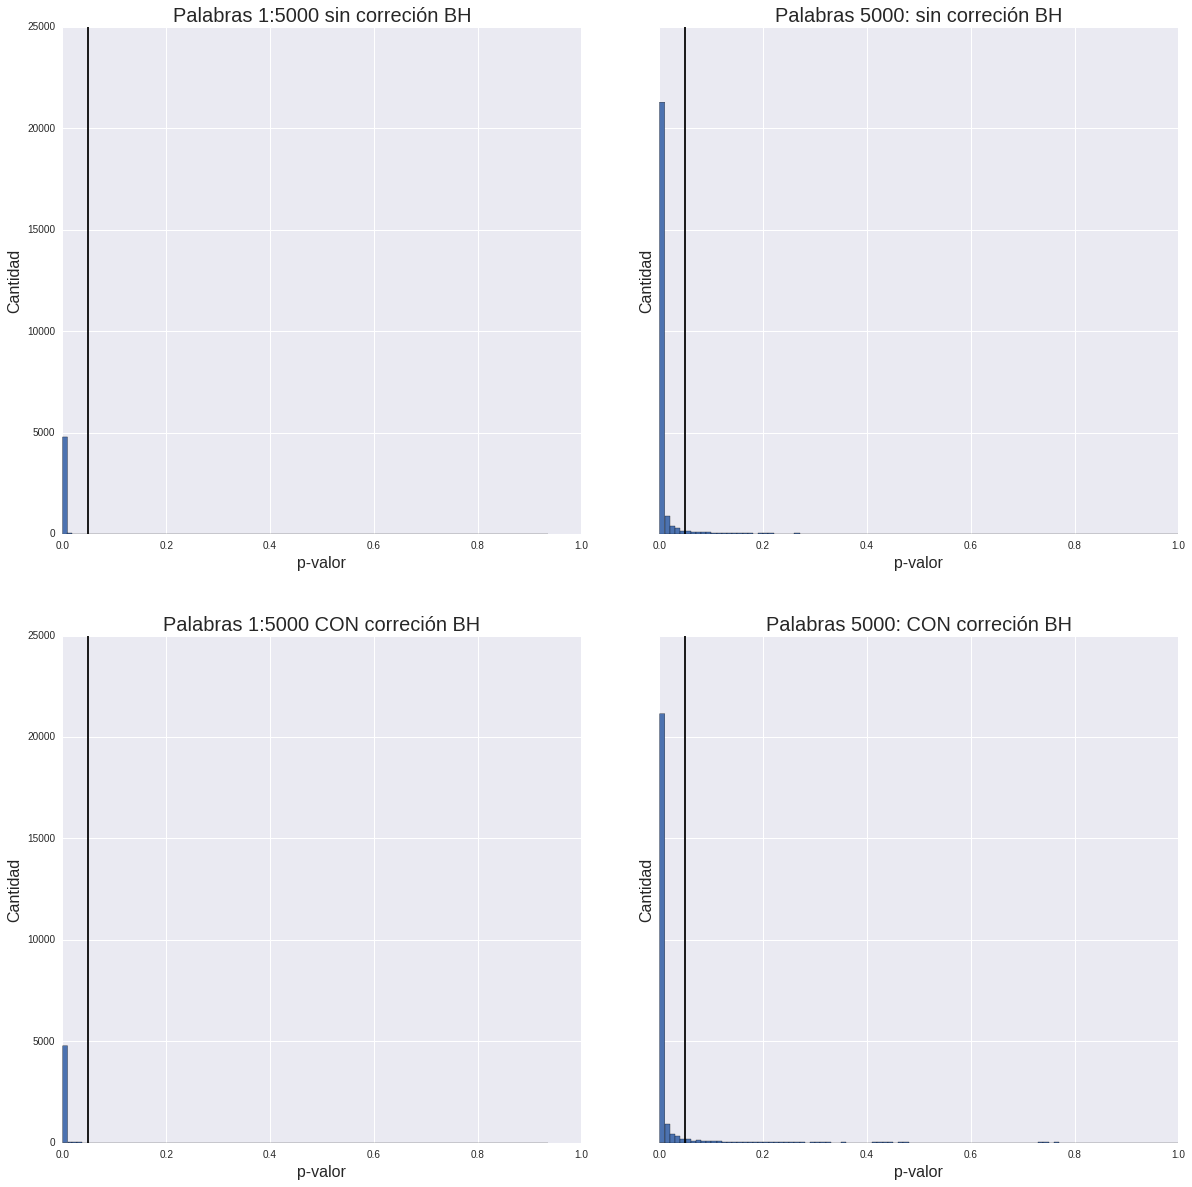

In [19]:
fig, axs = plt.subplots(nrows=2,ncols=2,sharey=True,figsize = (20,20))
todas_df.pvalorBootstrap.iloc[1:5000].hist(ax=axs[0][0],bins=100)
todas_df.pvalorBootstrap.iloc[5000:].hist(ax=axs[0][1],bins=100)
todas_df.p_adjusted.iloc[1:5000].hist(ax=axs[1][0],bins=100)
todas_df.p_adjusted.iloc[5000:].hist(ax=axs[1][1],bins=100)
fig.subplots_adjust(hspace=.2)
fig.subplots_adjust(wspace=.15)
for ax in axs.flatten():
    ax.set_xlabel("p-valor",fontsize=16)
    ax.set_ylabel("Cantidad",fontsize=16)
    ax.set_xlim([0,1])
    ax.axvline(0.05, color='black')
axs[0][0].set_title(u"Palabras 1:5000 sin correción BH",fontsize=20)
axs[1][0].set_title(u"Palabras 1:5000 CON correción BH",fontsize=20)
axs[0][1].set_title(u"Palabras 5000: sin correción BH",fontsize=20)
axs[1][1].set_title(u"Palabras 5000: CON correción BH",fontsize=20)

In [20]:
metricas = ["rankPalabras_Personas","rankPalabras","rankPersonas"]
for cant_pal in [5000,10000]:
    print('\n')
    for m in metricas:
        tasa_r = (todas_df.loc[df2[df2[m]<cant_pal].index].rechazo_H0).mean()*100
        print("Tasa de rechazo para las primeras {0} palabras según la metrica {1} (post correción): {2}".format(cant_pal,m,tasa_r))





Tasa de rechazo para las primeras 5000 palabras según la metrica rankPalabras_Personas (post correción): 97.3194638928
Tasa de rechazo para las primeras 5000 palabras según la metrica rankPalabras (post correción): 92.5022381379
Tasa de rechazo para las primeras 5000 palabras según la metrica rankPersonas (post correción): 98.2783357245


Tasa de rechazo para las primeras 10000 palabras según la metrica rankPalabras_Personas (post correción): 96.2096209621
Tasa de rechazo para las primeras 10000 palabras según la metrica rankPalabras (post correción): 94.0041589649
Tasa de rechazo para las primeras 10000 palabras según la metrica rankPersonas (post correción): 96.7568138601
